# Day 13 – K-Nearest Neighbors (KNN)

## What is KNN?

K-Nearest Neighbors (KNN) is a **supervised learning algorithm** used for both **classification and regression**.  
It works by finding the **K closest training samples** (neighbors) to a test sample and assigning the most common label (for classification) or the average value (for regression).

---

## How KNN Works

1. Choose the number of neighbors **K**.
2. Calculate the **distance** between the new data point and all training points (usually using **Euclidean distance**).
3. Select the **K nearest points**.
4. For classification, assign the **majority class** among the neighbors.

---

## Important Parameters

- `n_neighbors`: Number of neighbors to consider.
- `metric`: Distance metric (e.g., `'euclidean'`, `'manhattan'`).
- `weights`: `'uniform'` (equal vote) or `'distance'` (closer neighbors have more influence).

---

## Advantages

- Simple and intuitive.
- No training phase (lazy learner).
- Naturally handles multi-class problems.

---

## Disadvantages

- Slow for large datasets (requires computing distance to all points).
- Sensitive to irrelevant or scaled features.
- Performance depends on the choice of K.

---

## When to Use KNN?

- When you need a simple, interpretable model.
- When the dataset is small and clean.
- When the decision boundary is non-linear and flexible.

---

## Evaluation Metrics for Classification

- **Accuracy**
- **Precision, Recall, F1-Score**
- **Confusion Matrix**
- **Cross-Validation Score**

---




In [ ]:
## Python Example


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


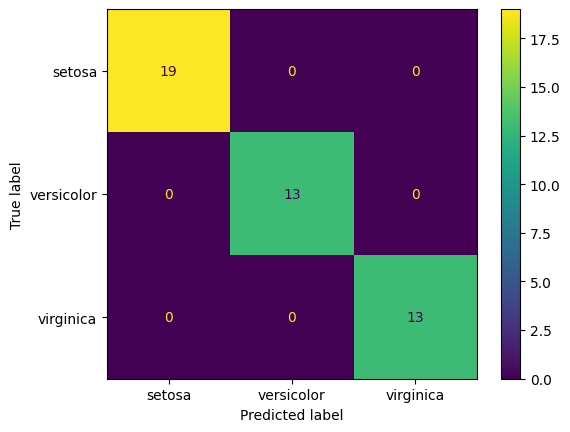

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()
